# a decision tree is a model that looks like flow cart it break downs it is a smaller piecs based on decision rules 

# why use Decision tree's ?

| prons | conce |
|--------|-------|
| easy to understand | can over fit on small data|
| know it to skil features | no grade with nosie data |
| workes with both numbers and texts | decision bounderies or accesed aline|

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
df = sns.load_dataset("titanic")
print(df)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

# select only relavent colums and drop row and missing data

In [4]:
df = df[["survived","pclass","sex","age","fare","embarked"]]
df = df.dropna()

In [5]:
print(df)

     survived  pclass     sex   age     fare embarked
0           0       3    male  22.0   7.2500        S
1           1       1  female  38.0  71.2833        C
2           1       3  female  26.0   7.9250        S
3           1       1  female  35.0  53.1000        S
4           0       3    male  35.0   8.0500        S
..        ...     ...     ...   ...      ...      ...
885         0       3  female  39.0  29.1250        Q
886         0       2    male  27.0  13.0000        S
887         1       1  female  19.0  30.0000        S
889         1       1    male  26.0  30.0000        C
890         0       3    male  32.0   7.7500        Q

[712 rows x 6 columns]


# convert sets and embarked columns to numbers

In [6]:
le_sex = LabelEncoder()
df["sex"] = le_sex.fit_transform(df["sex"])
le_embarked = LabelEncoder()
df["embarked"] = le_embarked.fit_transform(df["embarked"])

#### define input features(X) and output(y)

In [7]:
X = df[["pclass","sex","age","fare","embarked"]]
y = df["survived"]

In [8]:
print(X)

     pclass  sex   age     fare  embarked
0         3    1  22.0   7.2500         2
1         1    0  38.0  71.2833         0
2         3    0  26.0   7.9250         2
3         1    0  35.0  53.1000         2
4         3    1  35.0   8.0500         2
..      ...  ...   ...      ...       ...
885       3    0  39.0  29.1250         1
886       2    1  27.0  13.0000         2
887       1    0  19.0  30.0000         2
889       1    1  26.0  30.0000         0
890       3    1  32.0   7.7500         1

[712 rows x 5 columns]


In [9]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 712, dtype: int64


In [10]:
y.describe()

count    712.000000
mean       0.404494
std        0.491139
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

In [11]:
df.head(712)

,survived,pclass,sex,age,fare,embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2
...,...,...,...,...,...,...
885,0,3,0,39.0,29.1250,1
886,0,2,1,27.0,13.0000,2
887,1,1,0,19.0,30.0000,2
889,1,1,1,26.0,30.0000,0


In [12]:
# split data 80% for traning 20% of testing

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [14]:
# initialize the train  decisiontry model

In [15]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
#predict and evaluate

In [17]:
y_pred = dt_model.predict(X_test)

In [18]:
print("accuracy:",accuracy_score(y_test,y_pred))

accuracy: 0.6923076923076923


In [19]:
#classification report 

In [20]:
print("classification report :\n",classification_report(y_test,y_pred))

classification report :
               precision    recall  f1-score   support

           0       0.70      0.78      0.74        80
           1       0.67      0.59      0.63        63

    accuracy                           0.69       143
   macro avg       0.69      0.68      0.68       143
weighted avg       0.69      0.69      0.69       143



In [21]:
# confusion matrix

In [22]:
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))

confusion_matrix:
 [[62 18]
 [26 37]]


In [23]:
# heat map to do

confusion matrix
 [[62 18]
 [26 37]]


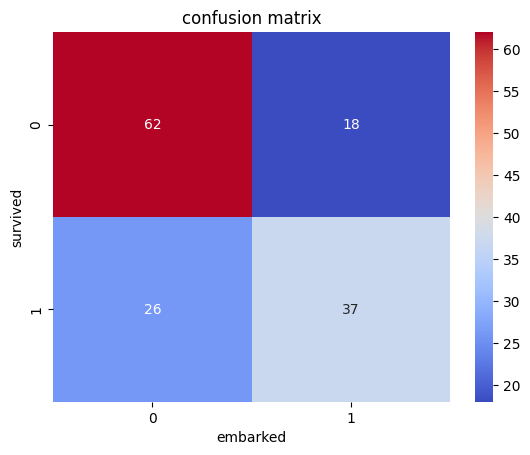

In [24]:
print("confusion matrix\n",confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm")
plt.title("confusion matrix")
plt.xlabel("embarked")
plt.ylabel("survived")
plt.show()

<Axes: xlabel='embarked', ylabel='count'>

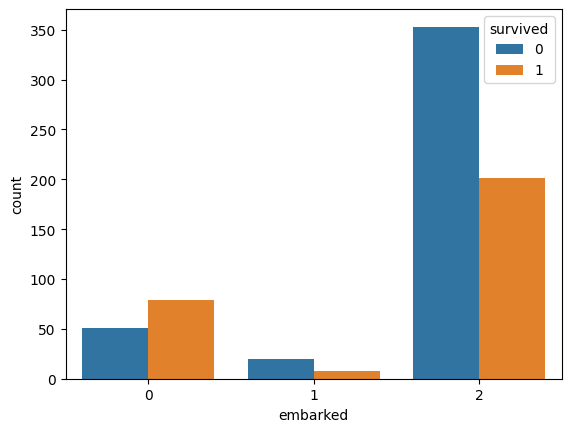

In [27]:
sns.countplot(x = "embarked",hue = "survived",data = df)